In [1]:
import tensorflow as tf
from tensorflow import keras 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fashion_mnist=keras.datasets.fashion_mnist

(train_images,train_labels),(test_images,test_labels)=fashion_mnist.load_data()

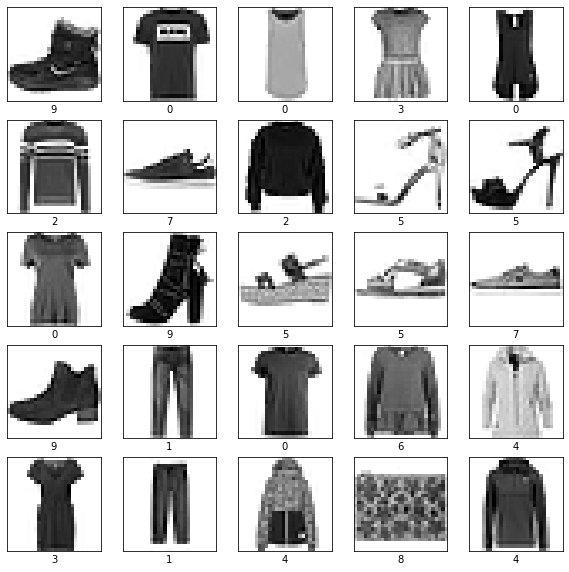

In [3]:
# Plot

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(train_images[i],cmap=plt.cm.binary)
    plt.xticks([])
    plt.yticks([])
    plt.tick_params(direction='in')
    plt.xlabel(train_labels[i])

In [4]:
# Normalization

train_images=train_images/255.
test_images=test_images/255.

In [5]:
model=keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(128,activation=tf.nn.relu),
    keras.layers.Dense(10,activation=tf.nn.softmax)
])

model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy")

model.fit(train_images,train_labels,epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 2s 37us/sample - loss: 0.4986
Epoch 2/5
60000/60000 [==============================] - 2s 42us/sample - loss: 0.3745- ETA: 0s - loss
Epoch 3/5
60000/60000 [==============================] - 3s 53us/sample - loss: 0.3368
Epoch 4/5
60000/60000 [==============================] - 3s 49us/sample - loss: 0.3117
Epoch 5/5
60000/60000 [==============================] - 2s 40us/sample - loss: 0.2933


In [7]:
model.evaluate(test_images,test_labels)

10000/10000 [==============================] - 0s 28us/sample - loss: 0.3474


0.3474212373018265

### If we using callback 

In [8]:
# Using callback

class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs={}):
        if(logs.get('loss')<0.4):
            print("\nLoss is low so cancelling training!")
            self.model.stop_training=True

In [9]:
callbacks=myCallback()

model=keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(128,activation=tf.nn.relu),
    keras.layers.Dense(10,activation=tf.nn.softmax)
])

model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy")

model.fit(train_images,train_labels,epochs=5,
          callbacks=[callbacks])

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 2s 40us/sample - loss: 0.4992
Epoch 2/5
59616/60000 [============================>.] - ETA: 0s - loss: 0.3707
Loss is low so cancelling training!
60000/60000 [==============================] - 2s 36us/sample - loss: 0.3703
